# Flight Price:

In [55]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_excel('flight_price.xlsx')

In [57]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [58]:
df.dropna(inplace = True)

In [59]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [60]:
df.drop_duplicates(keep='first',inplace=True)

In [61]:
"""
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?
"""

'\nQ1. Load the flight price dataset and examine its dimensions. How many rows and columns does the\ndataset have?\n'

In [62]:
df.shape

(10462, 11)

In [63]:
"""
ANS: 10462 rows and 11 columns
"""

'\nANS: 10462 rows and 11 columns\n'

In [64]:
"""
Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.
"""

'\nQ2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the\ndistribution.\n'

/tmp/ipykernel_169/2229499591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

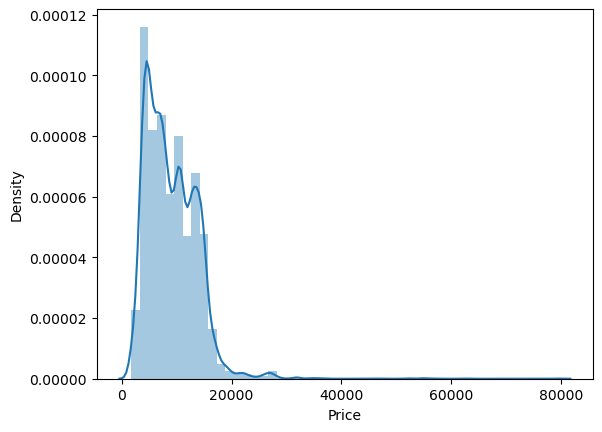

In [65]:
import seaborn as sns
sns.distplot(df['Price'])

In [66]:
"""
ANS: flight prices is right skewed distribution
"""

'\nANS: flight prices is right skewed distribution\n'

In [67]:
"""
Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
"""

'\nQ3. What is the range of prices in the dataset? What is the minimum and maximum price?\n'

In [68]:
df.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [69]:
"""
ANS: Min price: 1759.000000
Max Price: 79512.000000
"""

'\nANS: Min price: 1759.000000\nMax Price: 79512.000000\n'

In [70]:
"""
Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

"""

'\nQ4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different\nairlines.\n\n'

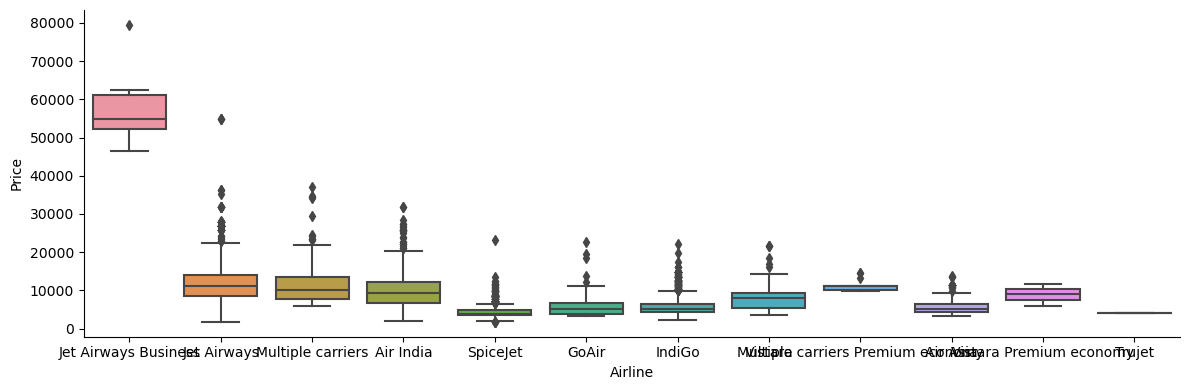

In [71]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [72]:
"""
Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.
"""

'\nQ5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how\nthey may impact your analysis.\n'

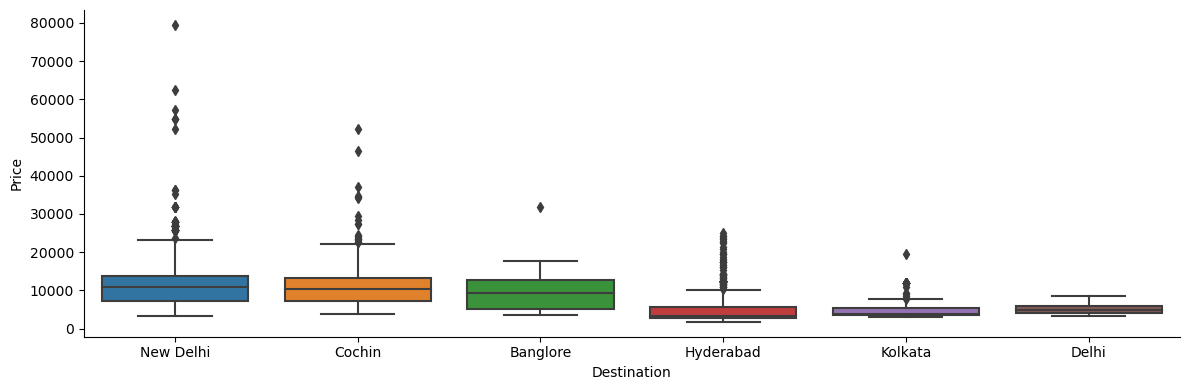

In [73]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [74]:
"""
Here we are plotting the box plot with the help of a cat plot between the price of the flight and the 
destination to which the passenger is travelling and figured out that New Delhi has the most outliers and 
Kolkata has the least.

Outlier can skew the statistical measures of central tendency, such as the mean and median, leading to biased 
estimates.
"""

'\nHere we are plotting the box plot with the help of a cat plot between the price of the flight and the \ndestination to which the passenger is travelling and figured out that New Delhi has the most outliers and \nKolkata has the least.\n\nOutlier can skew the statistical measures of central tendency, such as the mean and median, leading to biased \nestimates.\n'

In [75]:
"""
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?
"""

'\nQ6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset\nto identify the peak travel season. What features would you analyze to identify the peak season, and how\nwould you present your findings to your boss?\n'

In [76]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [77]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [78]:
df.drop('Date_of_Journey', axis=1, inplace=True)

Text(0, 0.5, 'Count of flights')

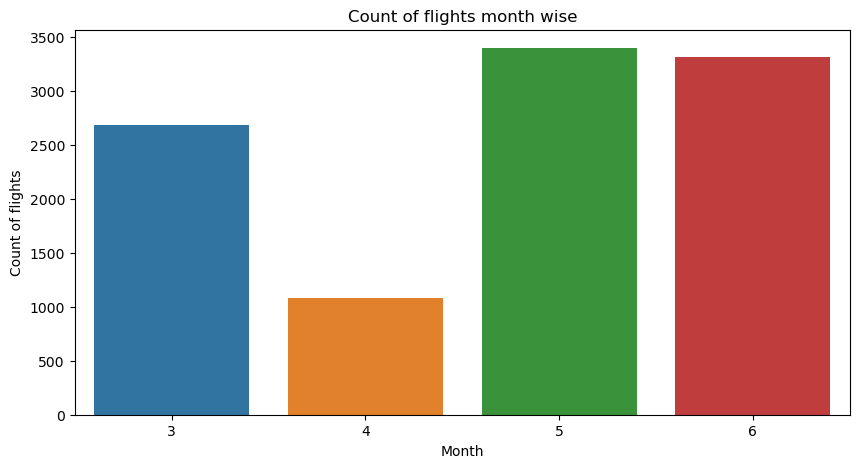

In [79]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

In [80]:
"""
- People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months
"""

'\n- People tend to travel less in April\n- Flights in May and June have a higher count, seems like people travel during holiday months\n'

In [81]:
"""
Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

"""

'\nQ7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight\nPrice dataset to identify any trends in flight prices. What features would you analyze to identify these\ntrends, and what visualizations would you use to present your findings to your team?\n\n'

In [82]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

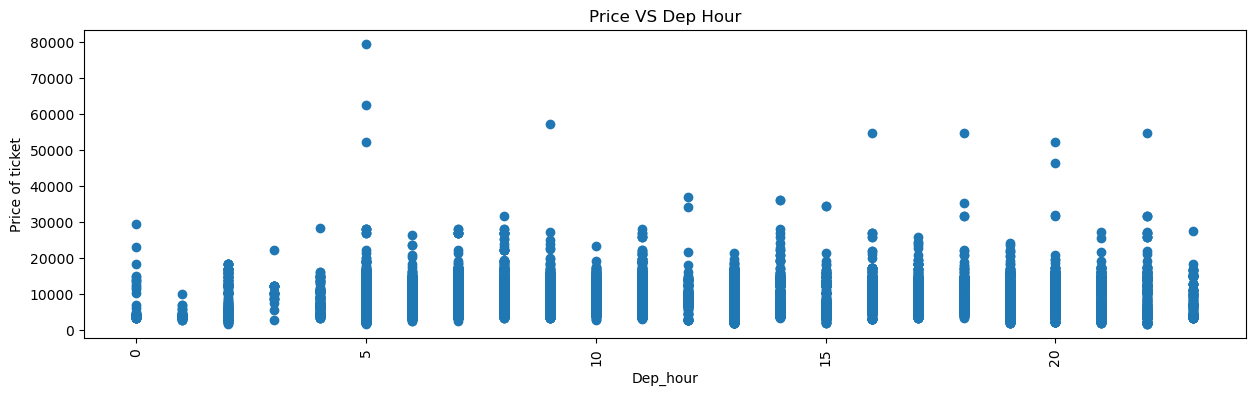

In [83]:
plt.figure(figsize = (15,4))
plt.title('Price VS Dep Hour')
plt.scatter(df['Dep_hour'], df['Price'])
plt.xticks
plt.xlabel('Dep_hour')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [84]:
"""
- Price seems higher at 5 am
"""

'\n- Price seems higher at 5 am\n'

In [85]:
"""
Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?
"""

'\nQ8. You are a data scientist working for an airline company, and you have been asked to analyze the\nFlight Price dataset to identify the factors that affect flight prices. What features would you analyze to\nidentify these factors, and how would you present your findings to the management team?\n'

In [86]:
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time', axis=1, inplace=True)

In [87]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)

In [90]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_hour'] = df['Duration_hour'].fillna(0)
df['Duration_min'] = df['Duration_min'].fillna(0)
df['Duration_hour'] = df['Duration_hour'].str.split('m').str[0]
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)
df.drop('Duration', axis=1, inplace=True)

In [96]:
df.drop('Route', axis=1, inplace=True)

In [97]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [98]:
categorical_feature

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

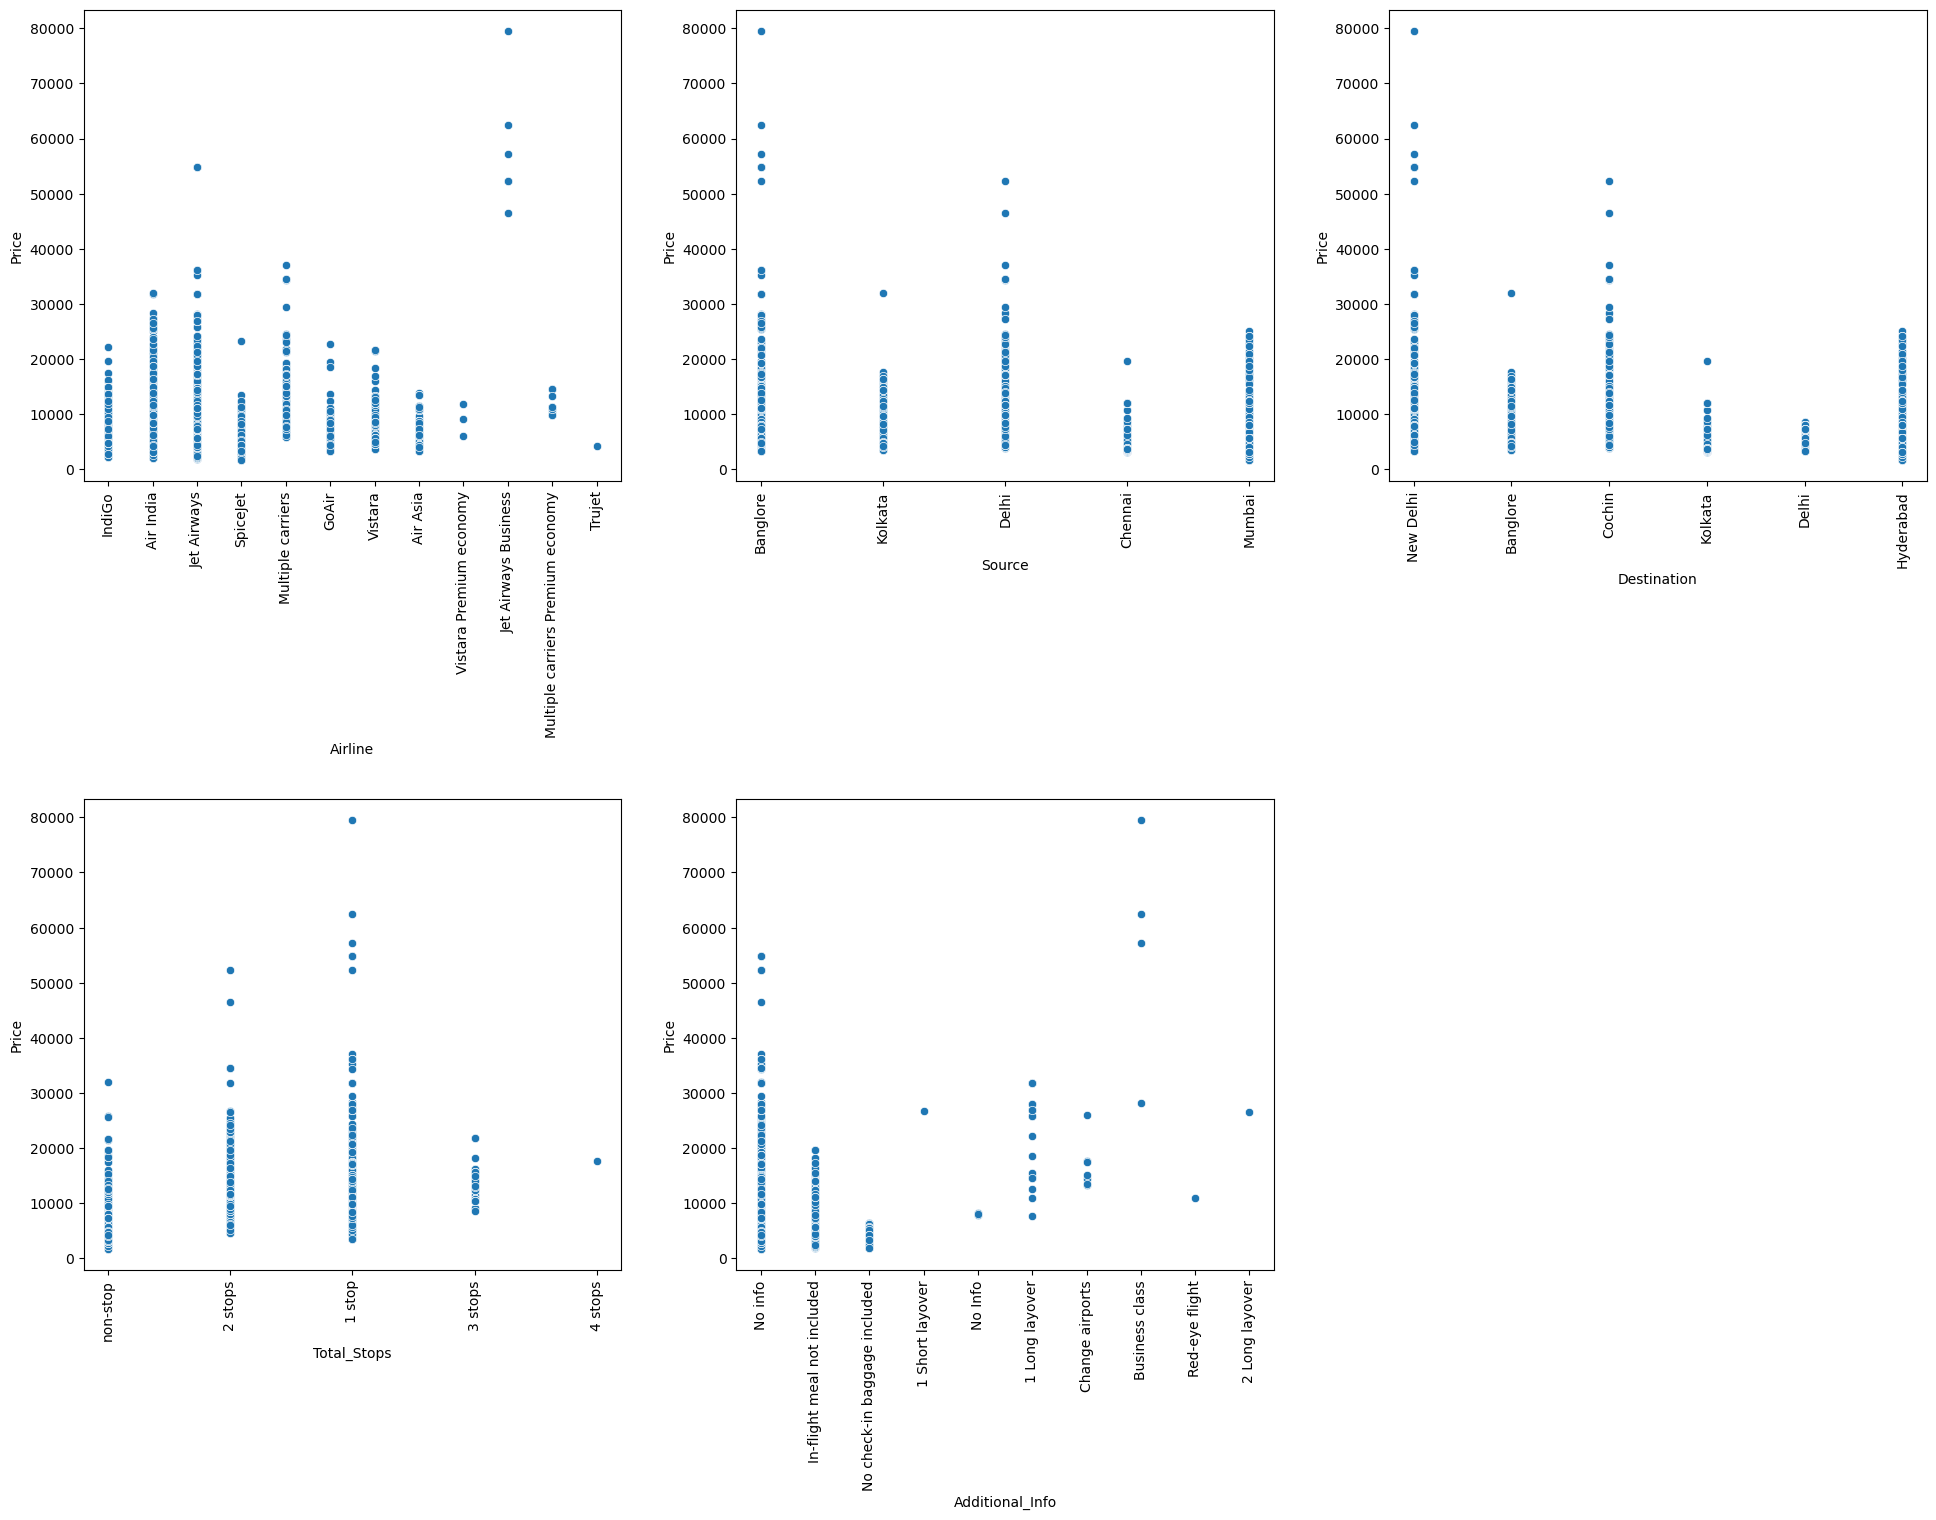

In [99]:
# checking for relation of price with categorical data
c=1
plt.figure(figsize=(20,45))
for i in categorical_feature:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

In [100]:
"""
- Jet airways business class has the highest prices between 50k — 80k

- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

- The flights with high prices having 1 stop
"""

'\n- Jet airways business class has the highest prices between 50k — 80k\n\n- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k\n\n- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k\n\n- The flights with high prices having 1 stop\n'

# Google Playstore:

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.columns = df.columns.str.replace(" ","_")

In [4]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
df=df.drop(df.index[10472])

In [6]:
df["Reviews"] = df["Reviews"].astype(int)

In [7]:
char_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in char_to_remove:
    for cols in cols_to_clean:
        df[cols] = df[cols].str.replace(item,'')

In [8]:
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

In [9]:
"""
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?
"""

'\nQ9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does\nthe dataset have?\n'

In [10]:
df.shape

(10840, 13)

In [11]:
"""
ANS: This dataset have 10841 rows and 13 columns
"""

'\nANS: This dataset have 10841 rows and 13 columns\n'

In [12]:
"""
Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

"""

'\nQ10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different\napp categories.\n\n'

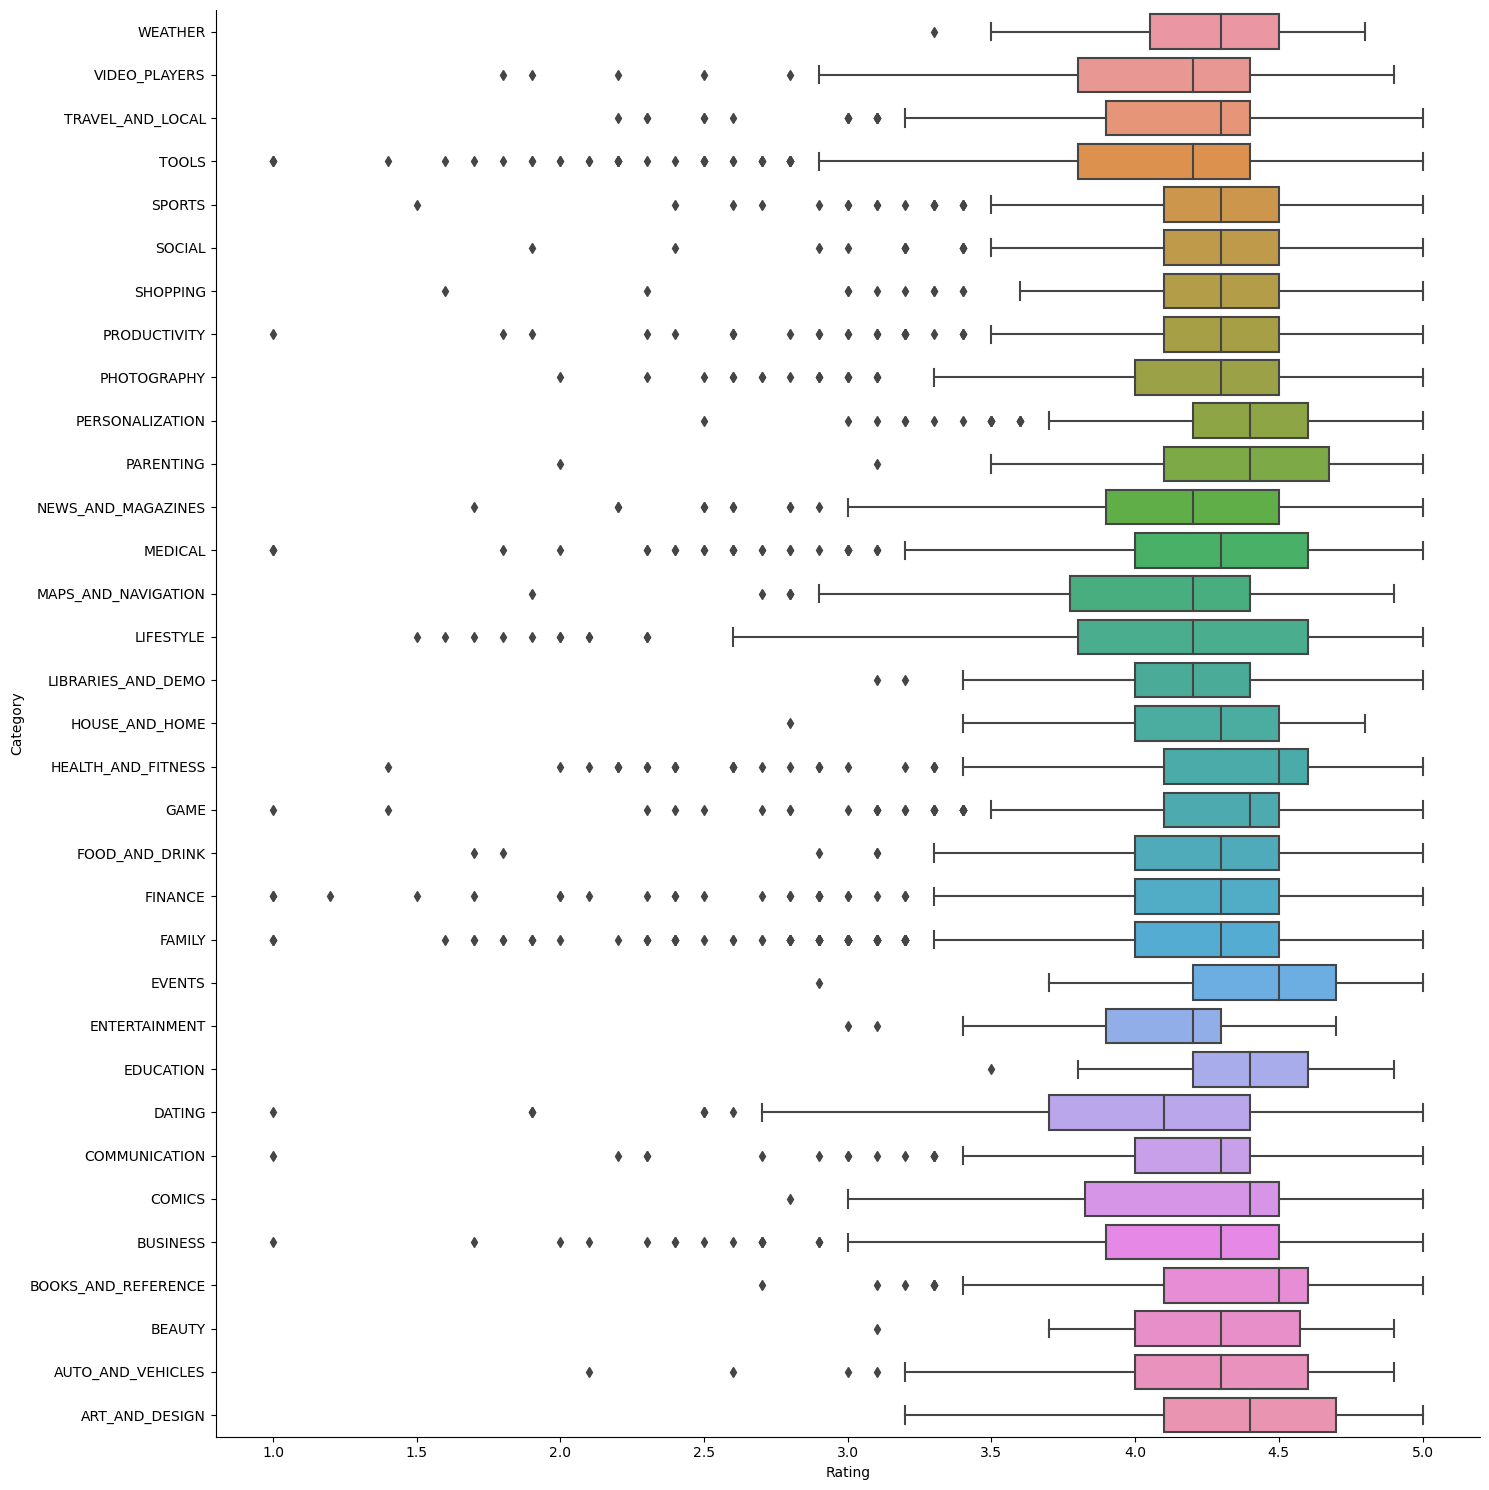

In [13]:
sns.catplot(y = "Category", x = "Rating", data = df.sort_values("Category", ascending = False), kind="box", height = 15, aspect = 1)
plt.show()

In [14]:
"""
Here we are plotting the box plot with the help of a cat plot between the Category of the playstore apps and the 
ratinngs of these apps and figured out that the tools, productivity, Finance New Delhi has the most outliers and 
Kolkata has the least.

Outlier can skew the statistical measures of central tendency, such as the mean and median, leading to biased 
estimates.
"""

'\nHere we are plotting the box plot with the help of a cat plot between the Category of the playstore apps and the \nratinngs of these apps and figured out that the tools, productivity, Finance New Delhi has the most outliers and \nKolkata has the least.\n\nOutlier can skew the statistical measures of central tendency, such as the mean and median, leading to biased \nestimates.\n'

In [15]:
"""
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.
"""

'\nQ11. Are there any missing values in the dataset? Identify any missing values and describe how they may\nimpact your analysis.\n'

In [16]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [17]:
"""
Going through all columns we find that we have 3 columns with NA values[Size, Rating, and Android Version].

To clean the data set, we need to handle missing values and categorical features, because the 
mathematics underlying most machine learning models assumes that the data is numerical and contains no 
missing values. Moreover, the scikit-learn library returns an error if we try to train a model like 
linear regression and logistic regression using data that contain missing or non-numeric values.
"""

'\nGoing through all columns we find that we have 3 columns with NA values[Size, Rating, and Android Version].\n\nTo clean the data set, we need to handle missing values and categorical features, because the \nmathematics underlying most machine learning models assumes that the data is numerical and contains no \nmissing values. Moreover, the scikit-learn library returns an error if we try to train a model like \nlinear regression and logistic regression using data that contain missing or non-numeric values.\n'

In [18]:
"""
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

"""

'\nQ12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize\nthe relationship.\n\n'

In [19]:
df_copy = df.drop(df[df.Rating.isnull()].index)
df_copy = df_copy.drop(df_copy[df_copy.Size.isnull()].index)

Text(0.5, 1.0, 'Size & Rating')

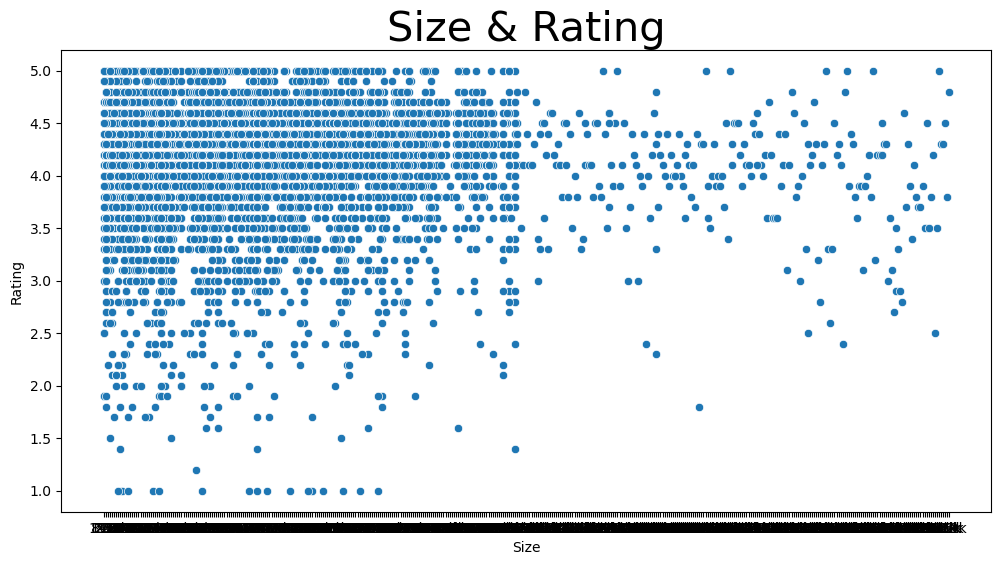

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_copy, y = "Rating", x = "Size")
plt.title("Size & Rating", size=30)

In [21]:
"""
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

"""

'\nQ13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.\n\n'

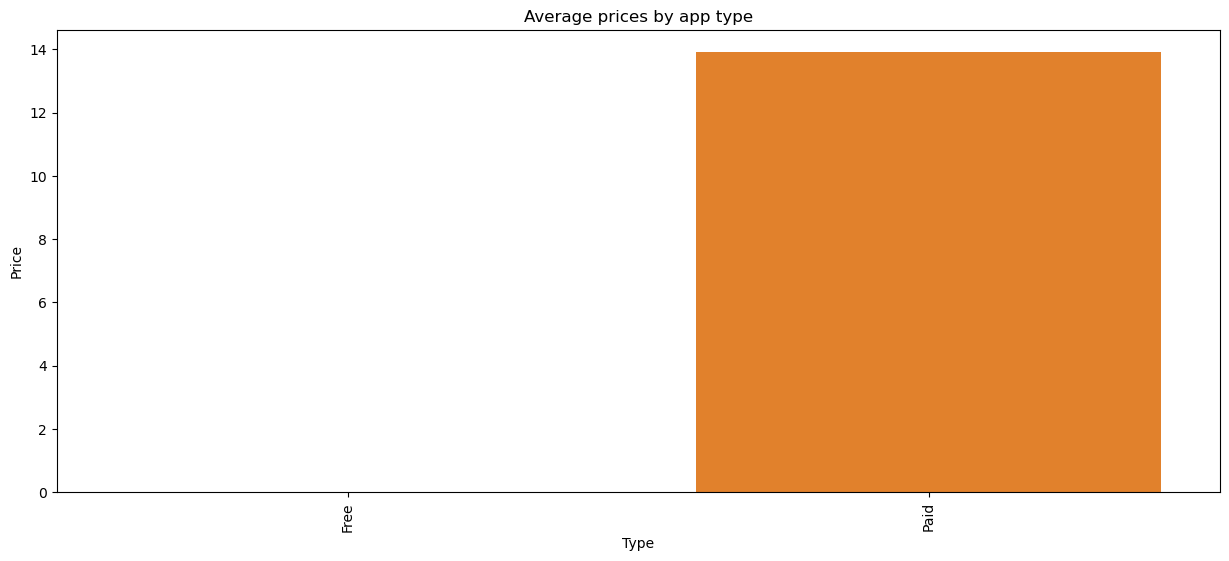

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Type', y='Price', data=df_copy, ci=False)
plt.title('Average prices by app type')
plt.xticks(rotation=90)
plt.show()

In [23]:
"""
Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

"""

'\nQ14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps\nwith the highest number of installs.\n\n'

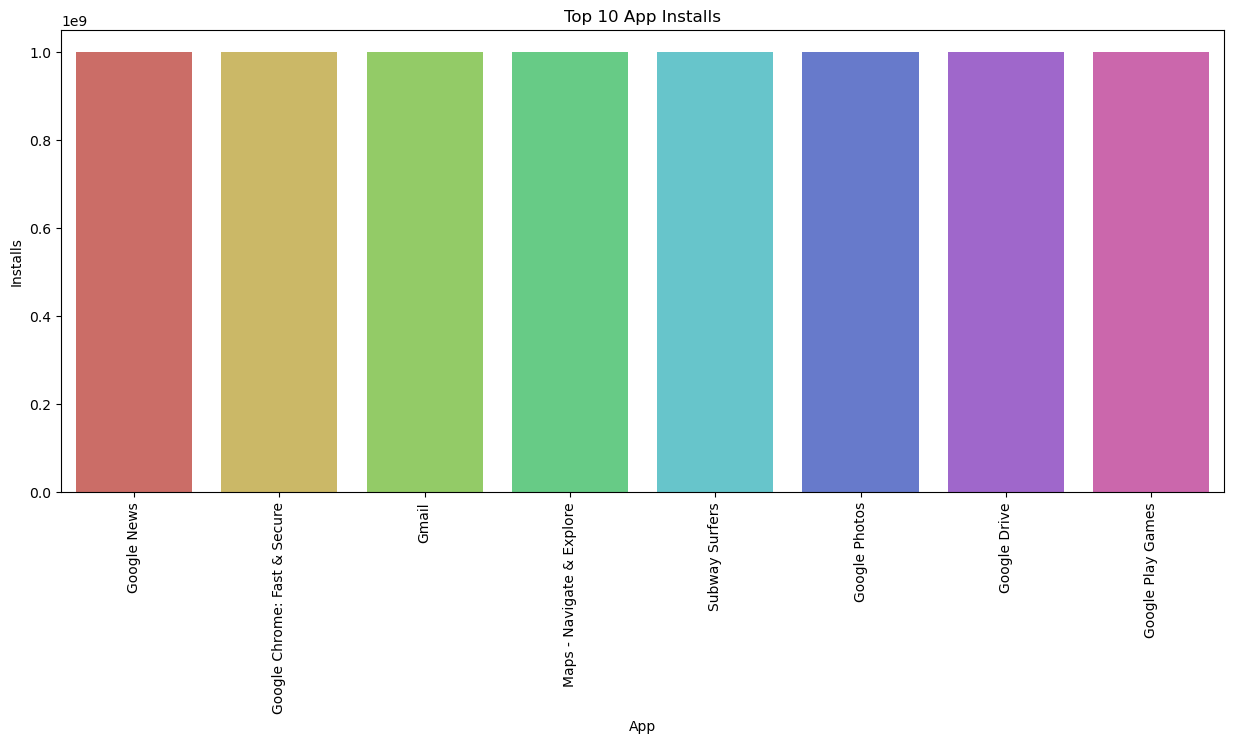

In [24]:
# top 10 apps
plt.figure(figsize=(15,6))
sns.barplot(x='App', y=df_copy['Installs'], data=df_copy.sort_values(by=['Installs'], ascending=False)[:10], palette='hls')
plt.title('Top 10 App Installs')
plt.xticks(rotation=90)
plt.show()

In [25]:
"""
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?
"""

'\nQ15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the\nGoogle Playstore dataset to identify the most popular app categories. How would you approach this\ntask, and what features would you analyze to make recommendations to the company?\n'

In [26]:
category = pd.DataFrame(df_copy['Category'].value_counts()) # Dataframe of apps on the bases on category
category.rename(columns={'Category': 'Count'}, inplace=True)

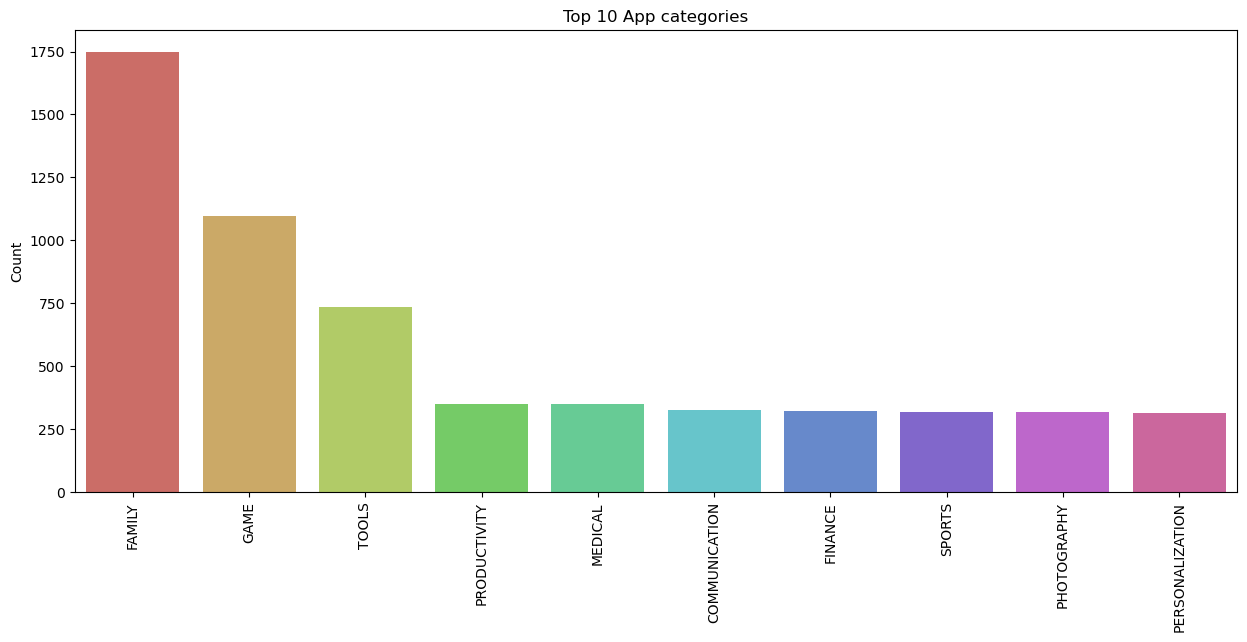

In [27]:
# top 10 apps
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='Count', data=category[:10], palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [28]:
"""
Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

"""

'\nQ16. A mobile app development company wants to analyze the Google Playstore dataset to identify the\nmost successful app developers. What features would you analyze to make recommendations to the\ncompany, and what data visualizations would you use to present your findings?\n\n'

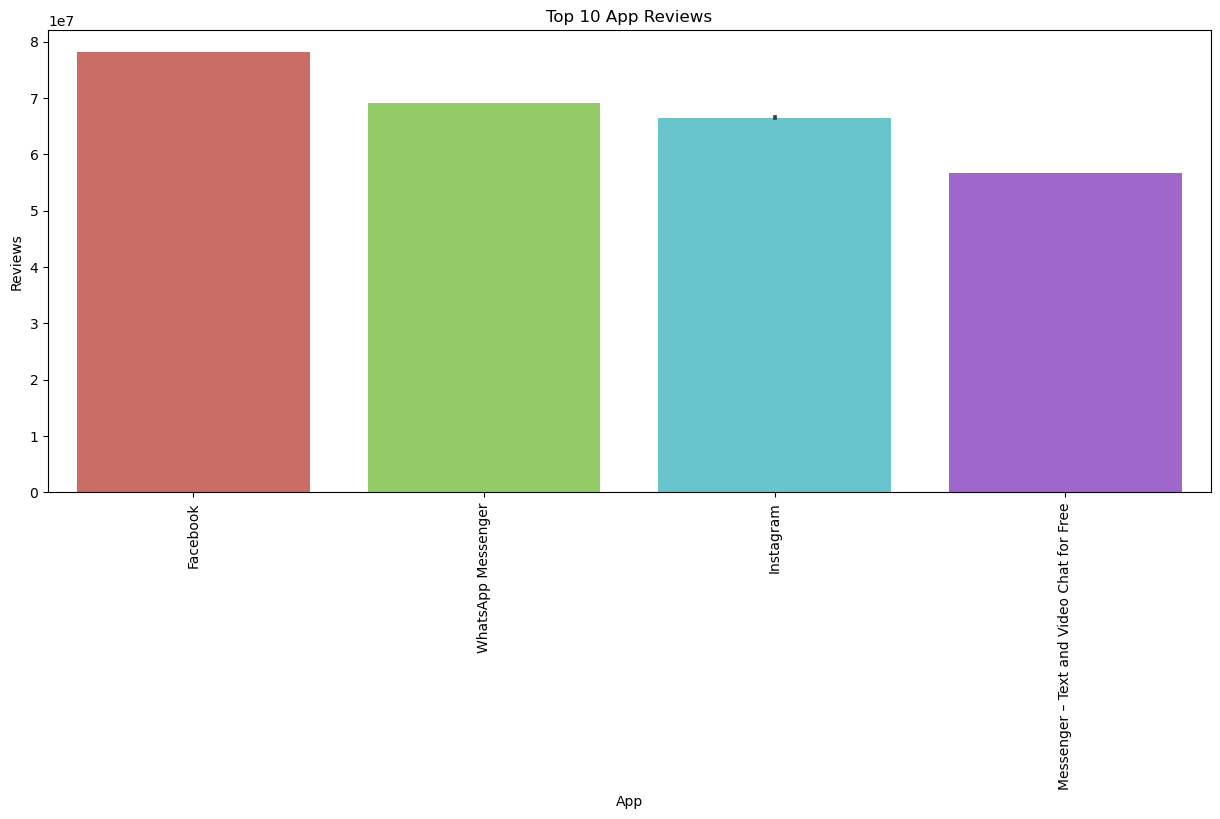

In [29]:
"""
Most successful app developer having good number of reviews
"""
# top 10 apps
plt.figure(figsize=(15,6))
sns.barplot(x='App', y=df_copy['Reviews'], data=df_copy.sort_values(by=['Reviews'], ascending=False)[:10], palette='hls')
plt.title('Top 10 App Reviews')
plt.xticks(rotation=90)
plt.show()

In [30]:
"""
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?
"""

'\nQ17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to\nlaunch a new app. What features would you analyze to make recommendations to the company, and\nwhat data visualizations would you use to present your findings?\n'

In [31]:
df_copy['Last_Updated'] = pd.to_datetime(df_copy['Last_Updated'])
df_copy['Day'] = df_copy['Last_Updated'].dt.day
df_copy['Month'] = df_copy['Last_Updated'].dt.month
df_copy['Year'] = df_copy['Last_Updated'].dt.year

In [33]:
df_copy.drop('Last_Updated', axis=1, inplace=True)

In [40]:
df_copy['Month_name'] = pd.to_datetime(
    df_copy['Month'], format='%m').dt.month_name()

<AxesSubplot: ylabel='Month_name'>

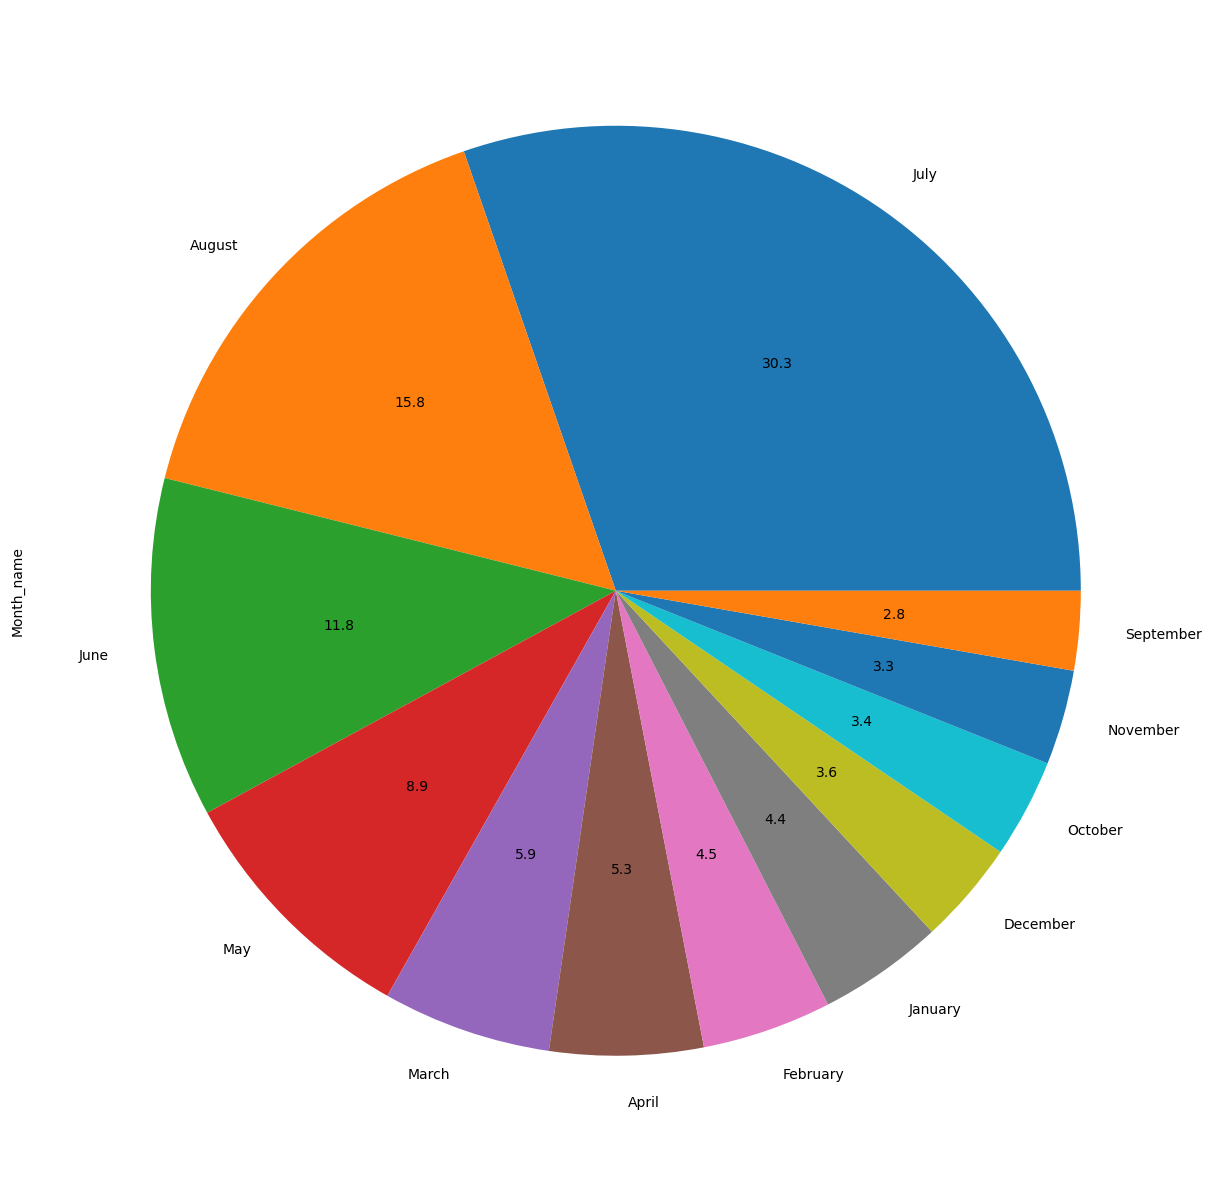

In [41]:
df_copy['Month_name'].value_counts().plot.pie(y=df_copy['Month_name'], figsize=(15,16), autopct='%1.1f')